# Classification 
- construct decision Tree with sklearn 
- Overfitting 
- Use `GridSearchCV` to find the BEST `max_depth` Decision Tree 
- Confusion matrix and different Model Evaluation Metrics


In [2]:
import pandas as pd
import numpy as np
from sklearn import tree, model_selection
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import graphviz as gv
from sklearn.metrics import accuracy_score, recall_score, make_scorer
from sklearn.inspection import PartialDependenceDisplay


happiness2017 = pd.read_csv("happiness2017.csv")
happiness2017

,country,year,life_ladder,logGDP,social_support,life_exp,freedom,generosity,corruption,continent
0,Afghanistan,2008,3.723590,7.197130,0.450662,47.550438,0.718114,0.183062,0.881686,Asia
1,Afghanistan,2009,4.401778,7.362664,0.552308,47.859673,0.678896,0.204633,0.850035,Asia
2,Afghanistan,2010,4.758381,7.416260,0.539075,48.159512,0.600127,0.138529,0.706766,Asia
3,Afghanistan,2011,3.831719,7.445761,0.521104,48.451160,0.495901,0.176108,0.731109,Asia
4,Afghanistan,2012,3.782938,7.549241,0.520637,48.738346,0.530935,0.247713,0.775620,Asia
...,...,...,...,...,...,...,...,...,...,...
1415,Zimbabwe,2012,4.955101,7.407775,0.896476,45.319149,0.469531,-0.059864,0.858691,Africa
1416,Zimbabwe,2013,4.690188,7.429061,0.799274,47.000294,0.575884,-0.062995,0.830937,Africa
1417,Zimbabwe,2014,4.184451,7.443748,0.765839,48.576164,0.642034,-0.033504,0.820217,Africa
1418,Zimbabwe,2015,3.703191,7.431285,0.735800,50.152035,0.667193,-0.081744,0.810457,Africa


In [3]:
happiness2017['life_exp_good'] = happiness2017['life_exp'] > 65
# We will say life expectancy (strictly) higher than 65 years is considered good life expectancy.

In [4]:
import numpy as np
np.random.seed(130)
happiness2017_cleaned = \
    happiness2017[['life_exp_good', 'logGDP', 'social_support', 'freedom', 'generosity']].dropna()
# train_test_split with sklearn, same concept as you see in TUT but easier to use! 
# Take advantage on existing tool, try not to reinvent the wheel when working!
# GPT may able to help you on this...
train, test = model_selection.train_test_split(happiness2017_cleaned, train_size=0.8)
X = train[['social_support']]
y = train["life_exp_good"]


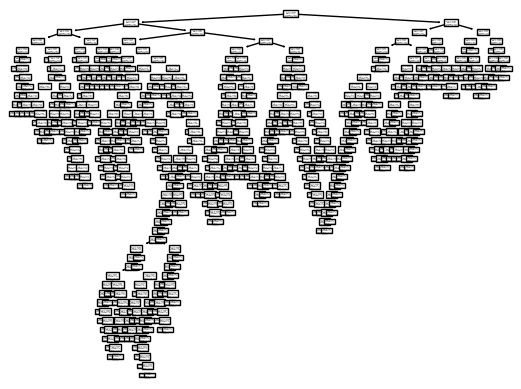

In [5]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, y)
_ = tree.plot_tree(clf)
# Voila! Here is a tree!
# We introduce the concept of decision tree, now we see how to code it, not that hard! python is fun!

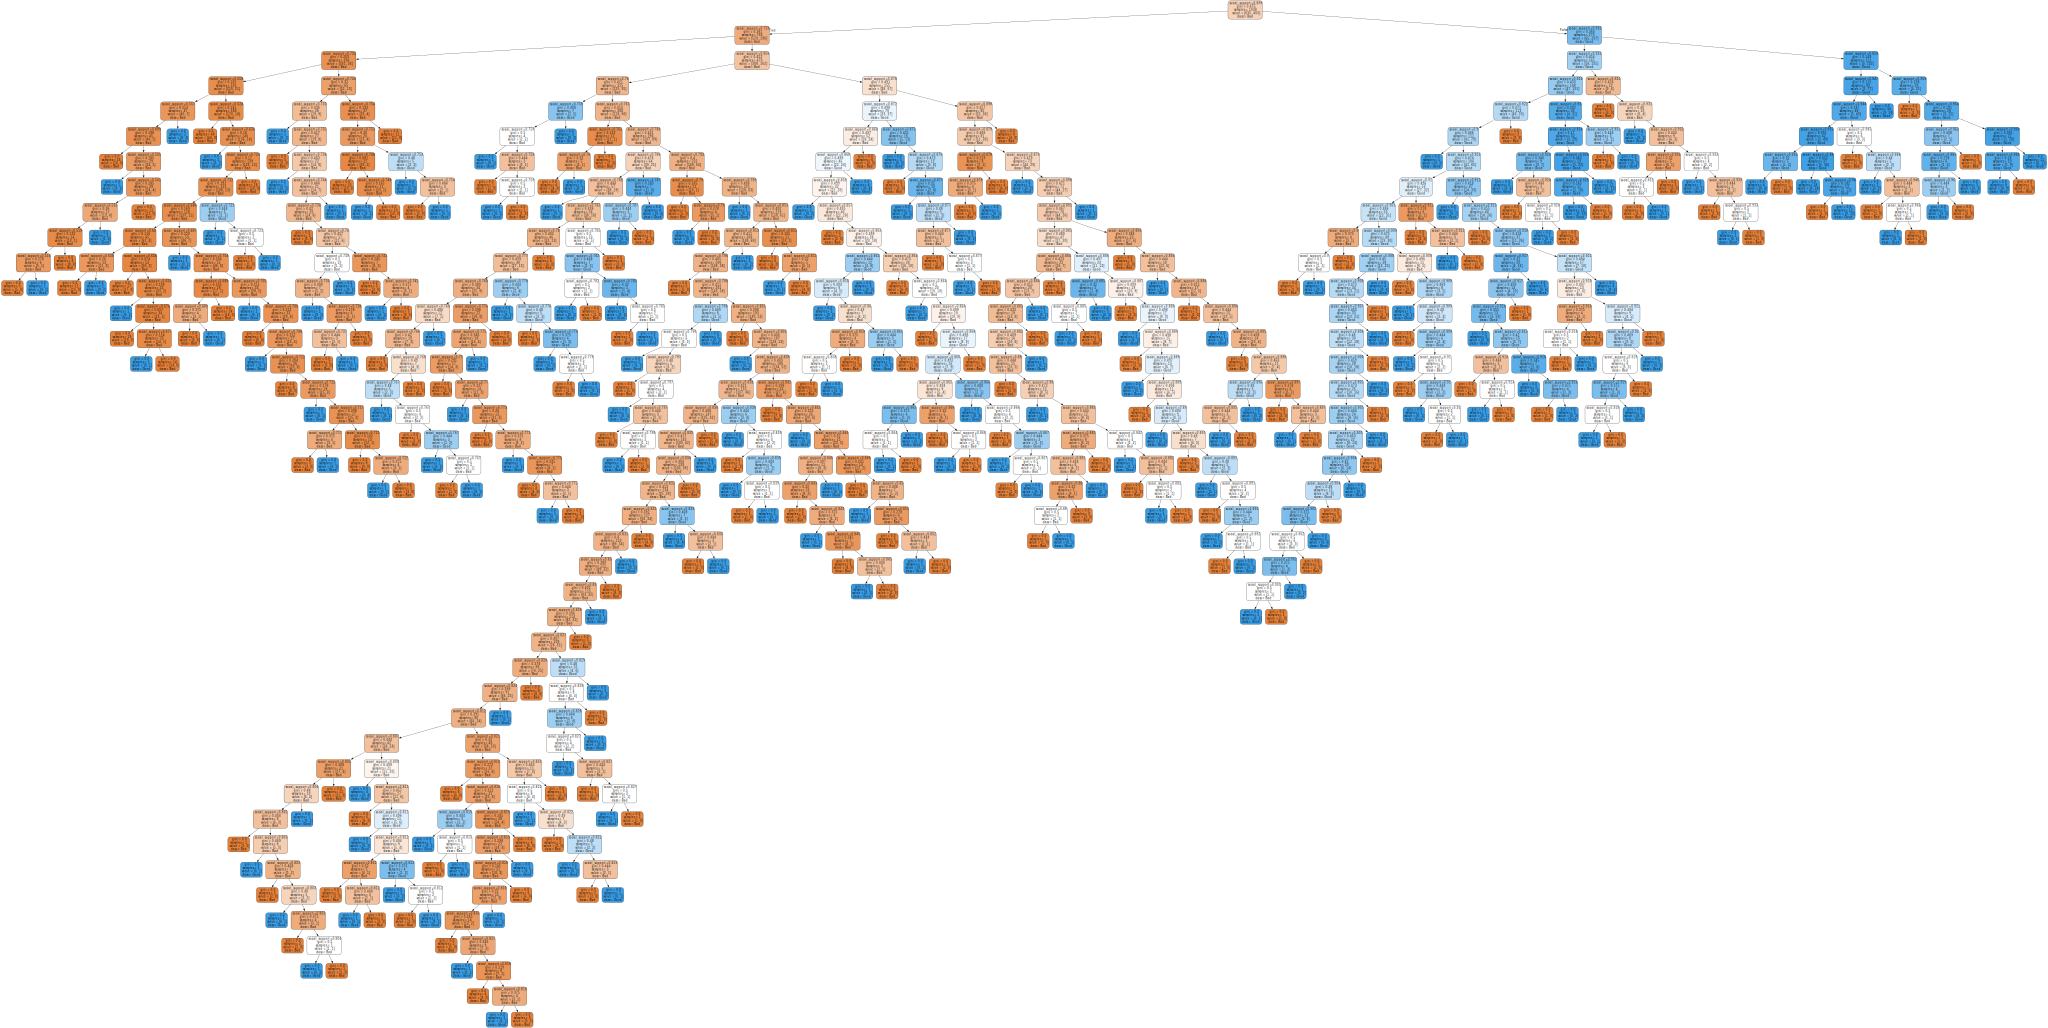

In [6]:
# If we want to take a better look of tree's details..
dot_data = tree.export_graphviz(clf, out_file=None, # max_depth=3,
                                feature_names=["social_support"],
                                class_names=["Bad","Good"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = gv.Source(dot_data, format='SVG')
graph
# overfitting? does it make sense to have a tree this deep? 
# After all we are only using one independent variable..


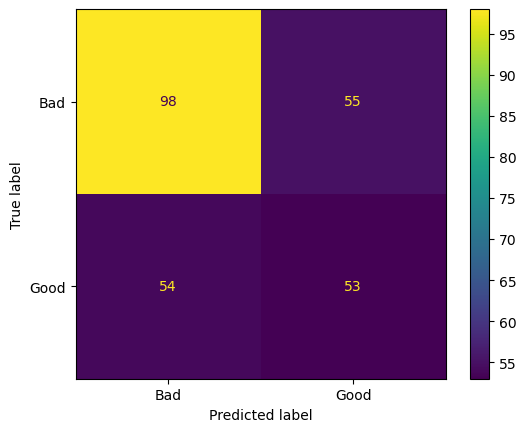

In [7]:
# We also saw this in tut, again, here's how we code it. Lets use this to explain how will did our tree do!
# remember different Model Evaluation Metrics? which one should we use?
cm_disp = ConfusionMatrixDisplay(confusion_matrix(test["life_exp_good"].values, 
                                                  clf.predict(test[['social_support']]), 
                                                  labels=[False, True]),
                                 display_labels=["Bad","Good"])
_ = cm_disp.plot()

In [8]:
# how deep should we go ? 
# best max_depth for our simple tree
# Set up the parameter grid
param_grid = {'max_depth': range(1, 20)}  # Adjust the range as needed

# Initialize the classifier
clf = tree.DecisionTreeClassifier()

# Set up GridSearchCV
grid_search = model_selection.GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X, y)

# Get the best max_depth
best_depth = grid_search.best_params_['max_depth']
print(f"The best max_depth found is: {best_depth}")


The best max_depth found is: 2


In [9]:
clf_max = tree.DecisionTreeClassifier(max_depth=2)
clf_m = clf_max.fit(X, y)

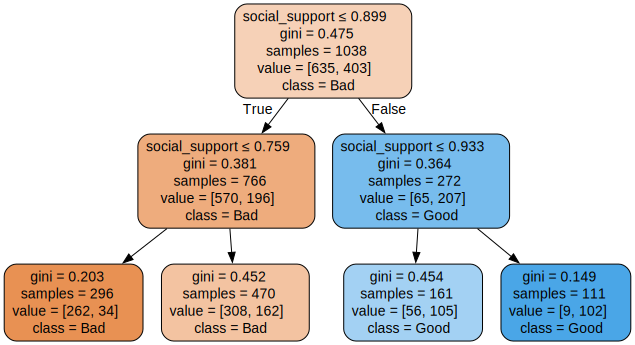

In [10]:
dot_data = tree.export_graphviz(clf_m, out_file=None,  max_depth=3,
                                feature_names=["social_support"],
                                class_names=["Bad","Good"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = gv.Source(dot_data, format='SVG')
graph

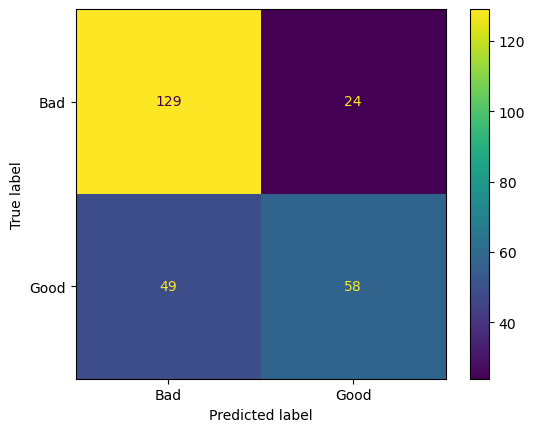

In [11]:
# better than our initial tree, even with our best_depth tree of only depth 1...
# indicate we have overfitting problem in initial tree
cm_disp = ConfusionMatrixDisplay(confusion_matrix(test["life_exp_good"].values, 
                                                  clf_m.predict(test[['social_support']]), 
                                                  labels=[False, True]),
                                 display_labels=["Bad","Good"])
_ = cm_disp.plot()

In [12]:
# Lets use more varibale to to predict
# Also worth mentioning: more variable usually means better prediction, but not always...

X = train[['logGDP', 'social_support', 'freedom', 'generosity']]
y = train["life_exp_good"]



In [13]:
param_grid = {'max_depth': range(1, 20)}  # Adjust the range as needed

# Initialize the classifier
clf = tree.DecisionTreeClassifier()

# Set up GridSearchCV
grid_search = model_selection.GridSearchCV(estimator=clf, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X, y)

# Get the best max_depth
best_depth = grid_search.best_params_['max_depth']
print(f"The best max_depth found is: {best_depth}")


The best max_depth found is: 8


In [14]:
clf_1 = tree.DecisionTreeClassifier(max_depth=16)
clf_1 = clf_1.fit(X, y)

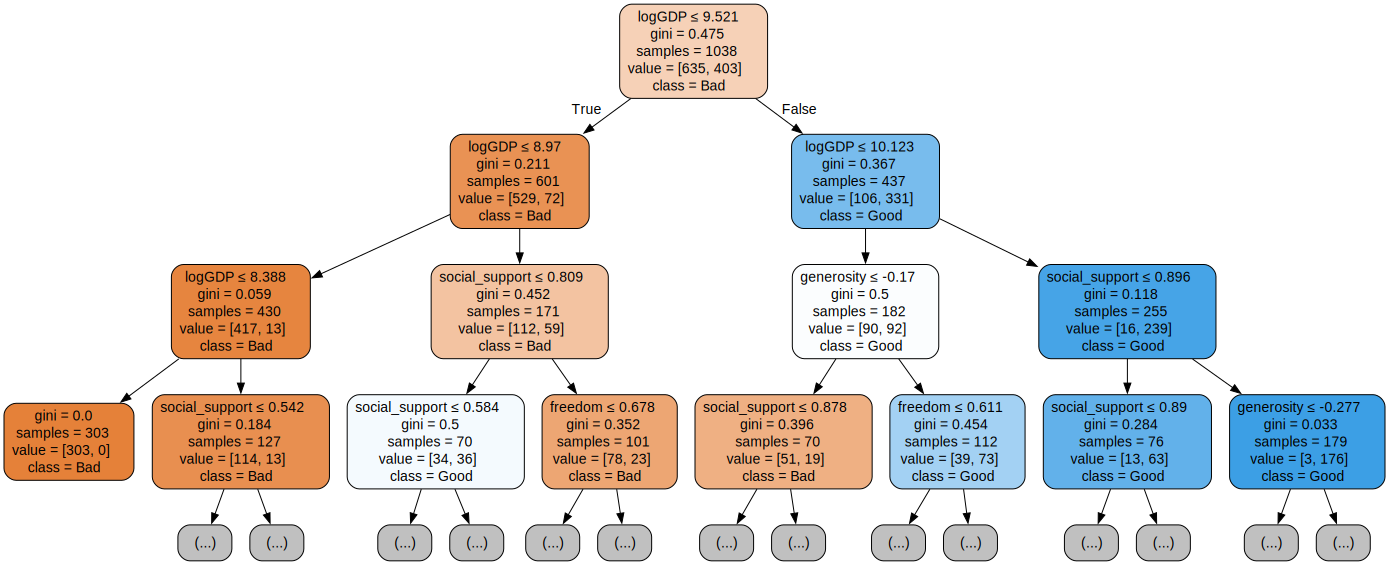

In [15]:
dot_data = tree.export_graphviz(clf_1, out_file=None, max_depth=3,
                                feature_names=["logGDP", "social_support", "freedom", "generosity"],
                                class_names=["Bad", "Good"],
                                filled=True, rounded=True,
                                special_characters=True)
graph = gv.Source(dot_data, format='SVG')
graph

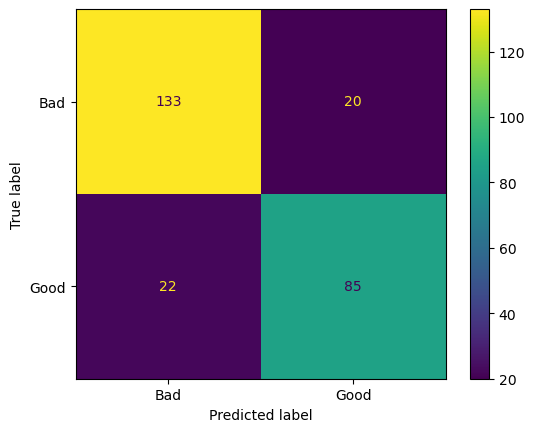

In [16]:
cm_disp = ConfusionMatrixDisplay(confusion_matrix(test["life_exp_good"].values, 
                                                  clf_1.predict(test[['logGDP', 'social_support', 'freedom', 'generosity']]), 
                                                  labels=[False, True]),
                                 display_labels=["Bad","Good"])
_ = cm_disp.plot()

In [ ]:
##### ~Sensitivity (True Positive Rate)~
~Sensitivity measures the proportion of actual positives that are correctly identified.
$$\text{Sensitivity} = \frac{TP}{TP + FN}$$~

##### ~Specificity (True Negative Rate)~
~Specificity measures the proportion of actual negatives that are correctly identified.
$$\text{Specificity} = \frac{TN}{TN + FP}$$~

##### ~Accuracy~
~Accuracy measures the proportion of true results (both true positives and true negatives) in the population.
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$~

##### ~Precision (Positive Predictive Value)~
~Precision measures the proportion of positive identifications that were actually correct.
$$\text{Precision} = \frac{TP}{TP + FP}$$~


In [ ]:
<a id='cf'></a>
# Confusion Matrices and Metrics

- **Accuracy** is the proportion of cases that are correctly identified.
- **Sensitivity** is the proportion of actual positive cases which are correctly identified to be positive (as true positives)
    - **Sensitivity** is also known as **true positive rate (TPR)**
- **Specificity** is the proportion of actual negative cases which are correctly identified to be negative (as true negative)
    - **Specificity** is also known as **true negative rate (TNR)**
- **False positive rates (FPR)** are defined to be the proportion of actually negative cases which are incorrectly identified (as false positives)
- **False negative rates (FNR)** are defined to be the proportion of actually positive cases which are incorrectly identified (as false negatives)
    - *but noticed how the FPR and FNR work in a sort of "flipped" manner in these definitions as they are defined with respect to the truth*

In formulas

\begin{align*}
\text{Accuracy}  & = {} (TP+TN)/\text{"total # of cases"}\\
TPR & = {} TP/(TP+FN) = 1-FNR \\
TNR & = {} TN/(TN+FP) = 1-FPR
\end{align*}

and you can read more and see a (greatly expanded) handy list of formulas at the following [wikipedia page.](https://en.wikipedia.org/wiki/Sensitivity_and_specificity)
